In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd

#보스턴 데이터셋 안돼서 캘리포니아로 대체
from sklearn.datasets import fetch_california_housing
# 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()

# 데이터를 DataFrame으로 변환
california_df = pd.DataFrame(california.data, columns=california.feature_names)
california_df['target'] = california.target

# DataFrame 출력
print(california_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [3]:
california_df['PRICE']=california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [4]:
print('캘리포니아 주택 가격 데이터셋 크기: ', california_df.shape)

캘리포니아 주택 가격 데이터셋 크기:  (20640, 10)


In [5]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
 9   PRICE       20640 non-null  float64
dtypes: float64(10)
memory usage: 1.6 MB


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
Y=california_df['PRICE']
X=california_df.drop(['PRICE'], axis=1, inplace=False)

In [8]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3, random_state=156)

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_predict=lr.predict(X_test)

In [12]:
mse=mean_squared_error(Y_test, Y_predict)
rmse=np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 0.000, RMSE : 0.000
R^2(Variance score) : 1.000


In [13]:
print('Y 절편 값: ', lr.intercept_)
print('회귀 계수값: ', np.round(lr.coef_, 1))

Y 절편 값:  1.4566126083082054e-13
회귀 계수값:  [-0. -0. -0.  0.  0. -0.  0.  0.  1.]


In [14]:
coef=pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

target        1.0
MedInc       -0.0
HouseAge     -0.0
AveRooms     -0.0
AveBedrms     0.0
Population    0.0
AveOccup     -0.0
Latitude      0.0
Longitude     0.0
dtype: float64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

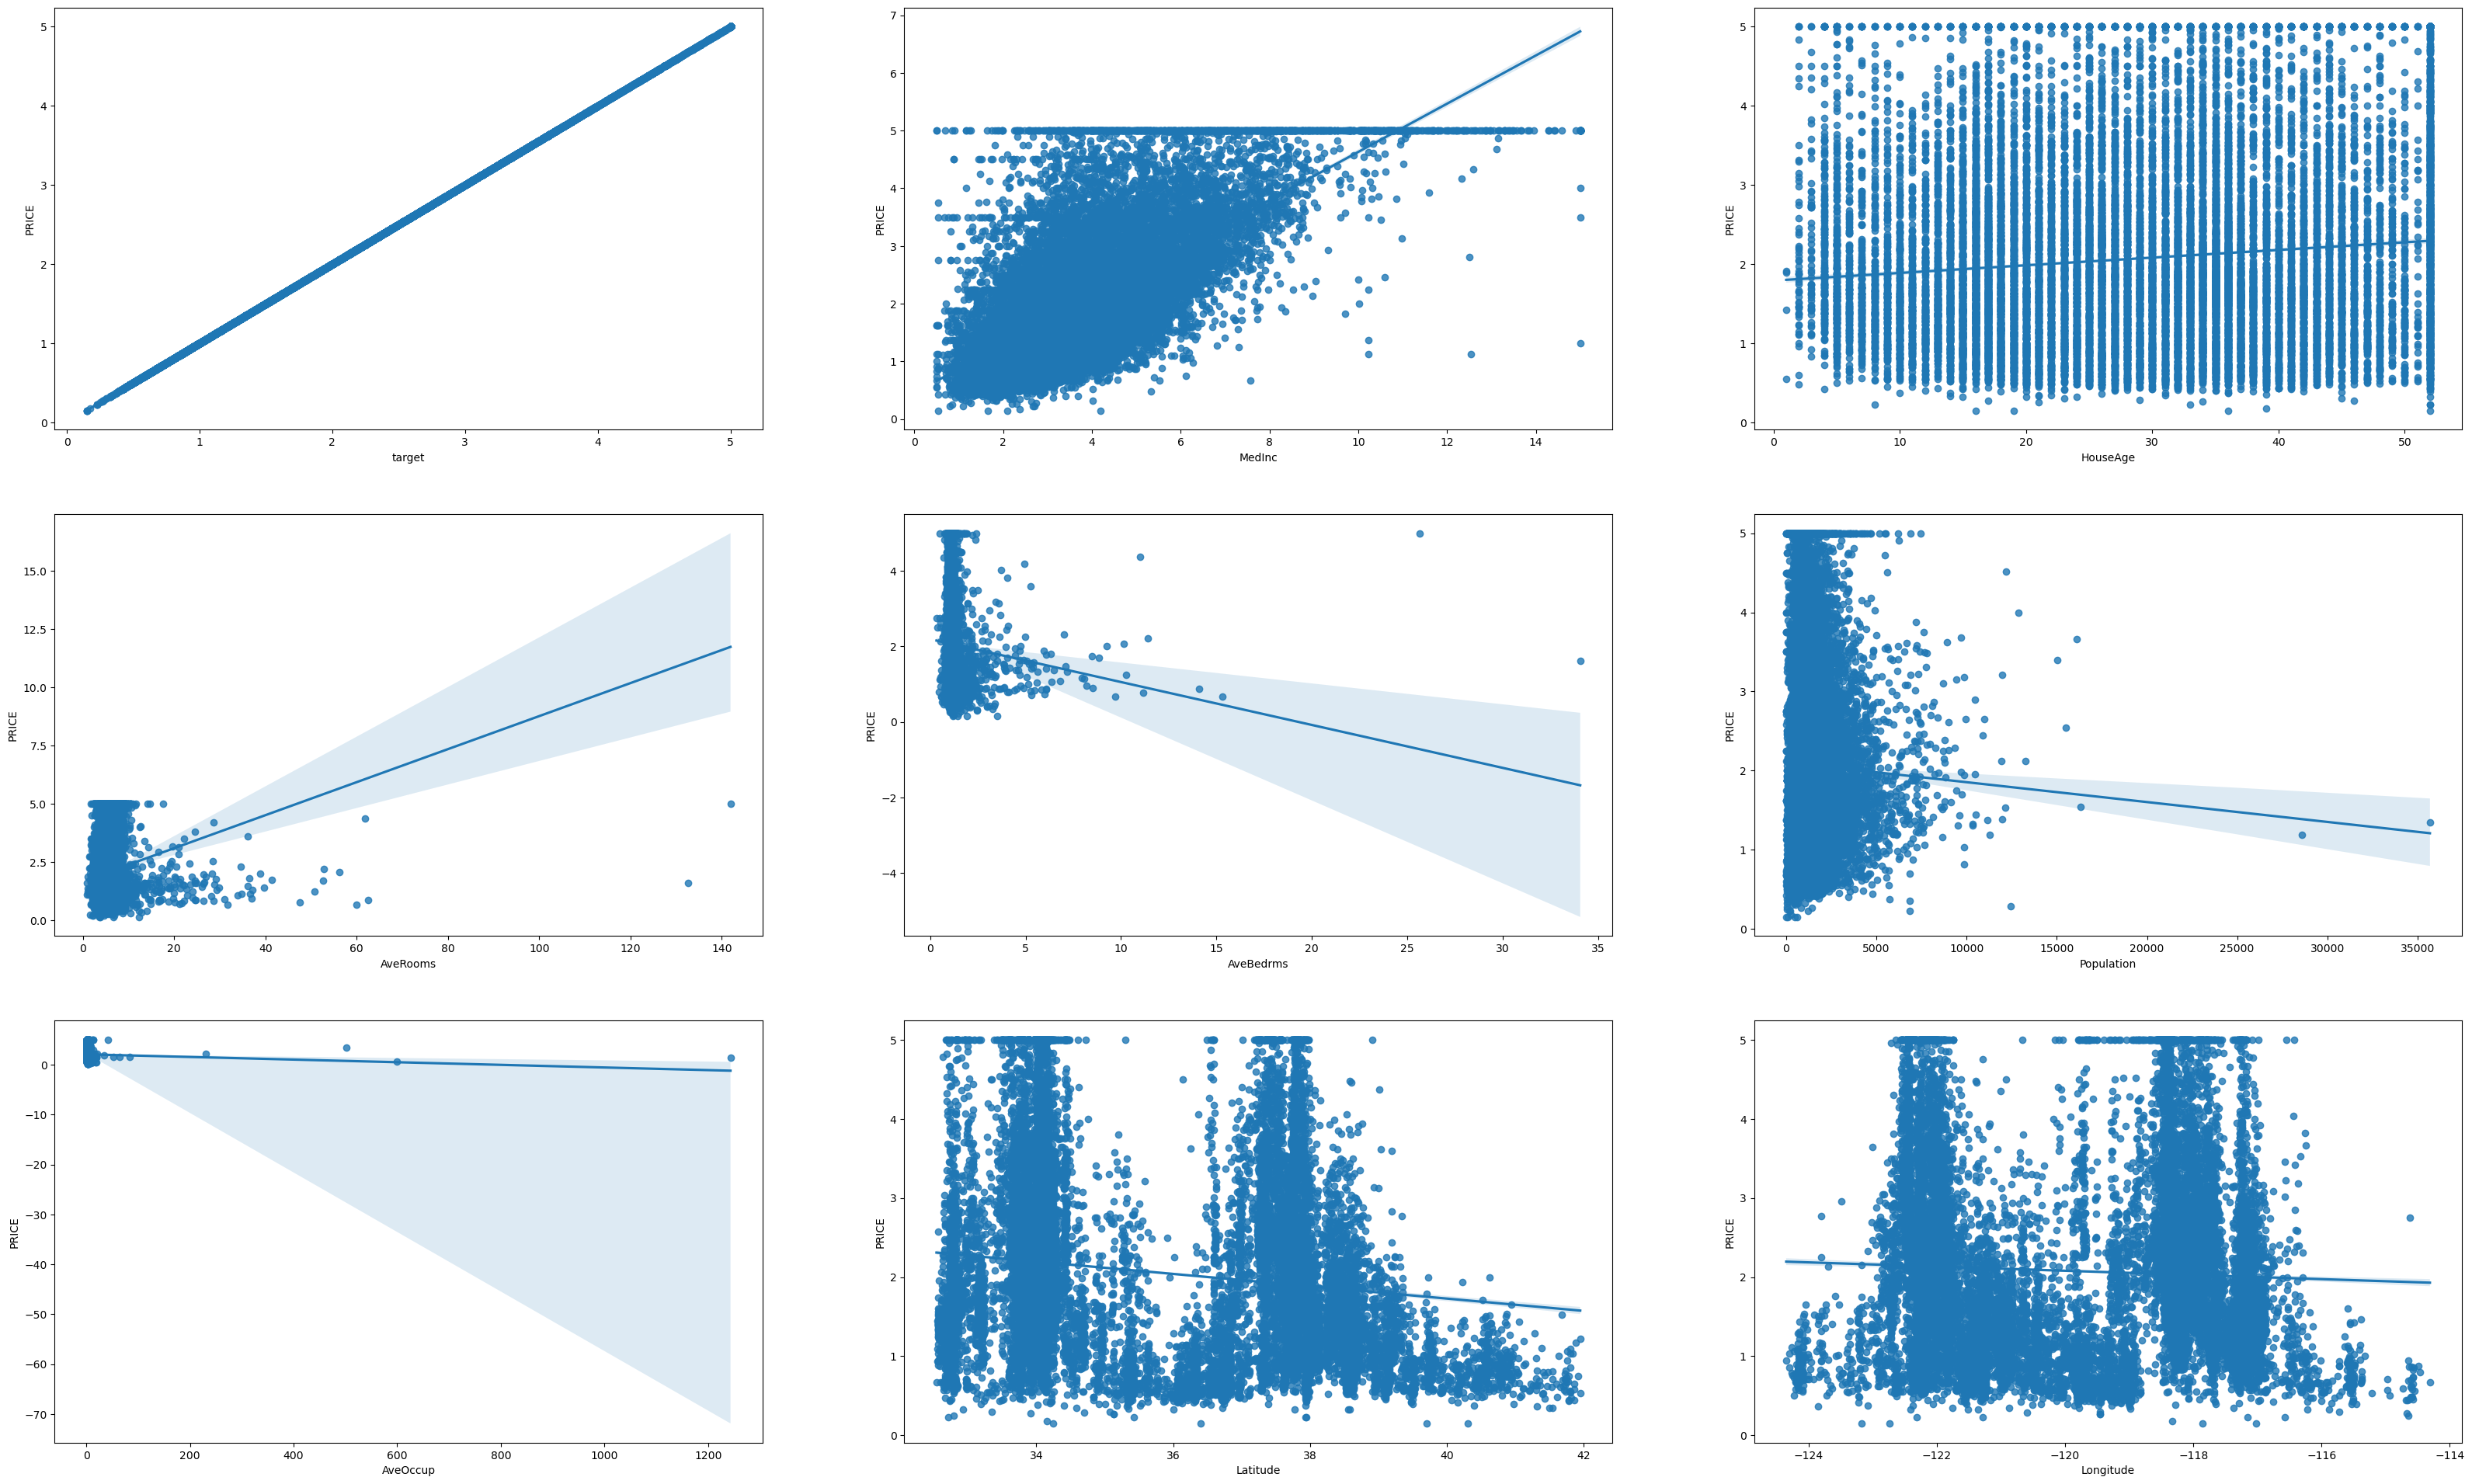

In [19]:
# 독립 변수 9개 이므로 3행 3열 구조로 나타내기
fig, axs = plt.subplots(figsize=(40, 24), nrows=3, ncols=3)

x_features = ['target', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

for i, feature in enumerate(x_features):
      row = int(i/3)
      col = i%3
      sns.regplot(x=feature, y='PRICE', data=california_df, ax=axs[row][col])